In [1]:
# ==========================================
# STEP 1: Install & Import Libraries
# ==========================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

# Make plots look better
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (8,5)

In [3]:
# STEP 2: Load Dataset
# ==========================================
# If the dataset is uploaded to Colab manually
url = "/content/german_credit_data.csv"   # ✅ Correct path format
df = pd.read_csv(url)

print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
df.head()


✅ Dataset Loaded Successfully!
Shape: (1000, 21)


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [4]:
print("Columns in dataset:", df.columns.tolist())
df.head()


Columns in dataset: ['laufkont', 'laufzeit', 'moral', 'verw', 'hoehe', 'sparkont', 'beszeit', 'rate', 'famges', 'buerge', 'wohnzeit', 'verm', 'alter', 'weitkred', 'wohn', 'bishkred', 'beruf', 'pers', 'telef', 'gastarb', 'kredit']


,laufkont,laufzeit,moral,verw,hoehe,sparkont,beszeit,rate,famges,buerge,...,verm,alter,weitkred,wohn,bishkred,beruf,pers,telef,gastarb,kredit
0,1,18,4,2,1049,1,2,4,2,1,...,2,21,3,1,1,3,2,1,2,1
1,1,9,4,0,2799,1,3,2,3,1,...,1,36,3,1,2,3,1,1,2,1
2,2,12,2,9,841,2,4,2,2,1,...,1,23,3,1,1,2,2,1,2,1
3,1,12,4,0,2122,1,3,3,3,1,...,1,39,3,1,2,2,1,1,1,1
4,1,12,4,0,2171,1,3,4,3,1,...,2,38,1,2,2,2,2,1,1,1


In [5]:
# ==========================================
# STEP 3: Preprocessing (Fixed for your dataset)
# ==========================================

# Target column
target = "kredit"   # ✅ This is your label

# Features & Target
X = df.drop(target, axis=1)
y = df[target]

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Scale features (all are numeric, so no encoding needed)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("✅ Preprocessing Completed!")
print("Train Shape:", X_train.shape, "Test Shape:", X_test.shape)

✅ Preprocessing Completed!
Train Shape: (800, 20) Test Shape: (200, 20)


In [6]:
# ==========================================
# STEP 4: Train Models
# ==========================================
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Decision Tree": DecisionTreeClassifier(max_depth=5, random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    auc = roc_auc_score(y_test, y_pred)
    results[name] = auc
    print(f"\n🔹 {name} Results:")
    print(classification_report(y_test, y_pred))
    print("ROC-AUC:", auc)

# Compare Models
print("\n📊 Model Comparison (ROC-AUC):")
for k, v in results.items():
    print(f"{k}: {v:.4f}")


🔹 Logistic Regression Results:
              precision    recall  f1-score   support

           0       0.66      0.48      0.56        60
           1       0.80      0.89      0.84       140

    accuracy                           0.77       200
   macro avg       0.73      0.69      0.70       200
weighted avg       0.76      0.77      0.76       200

ROC-AUC: 0.6880952380952381

🔹 Decision Tree Results:
              precision    recall  f1-score   support

           0       0.49      0.67      0.56        60
           1       0.83      0.70      0.76       140

    accuracy                           0.69       200
   macro avg       0.66      0.68      0.66       200
weighted avg       0.73      0.69      0.70       200

ROC-AUC: 0.6833333333333335

🔹 Random Forest Results:
              precision    recall  f1-score   support

           0       0.73      0.50      0.59        60
           1       0.81      0.92      0.86       140

    accuracy                           0.8

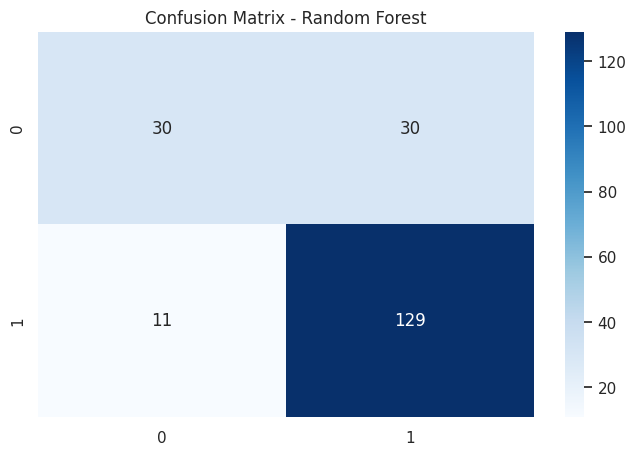

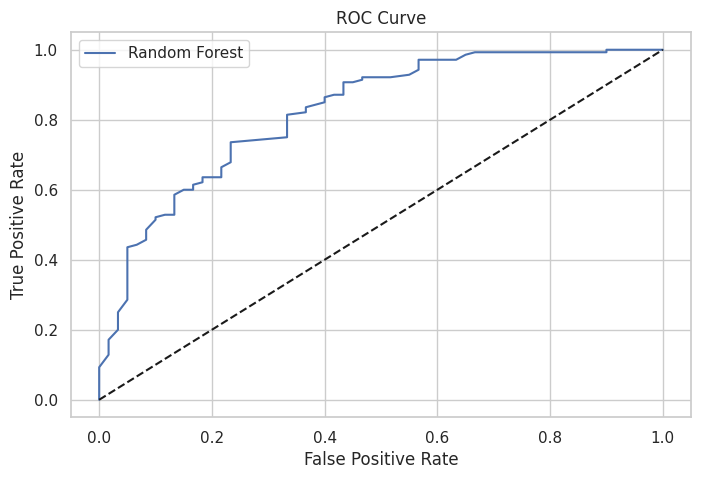

In [7]:
# ==========================================
# STEP 5: Confusion Matrix + ROC Curve
# ==========================================
best_model = RandomForestClassifier(n_estimators=200, random_state=42)
best_model.fit(X_train, y_train)
y_pred = best_model.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Random Forest")
plt.show()

# ROC Curve
y_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label="Random Forest")
plt.plot([0,1], [0,1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

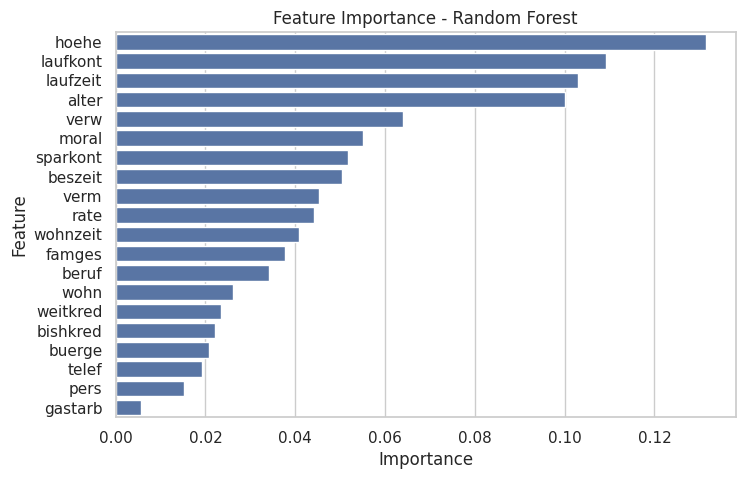

In [8]:
# ==========================================
# STEP 6: Feature Importance
# ==========================================
importances = best_model.feature_importances_
feat_names = df.drop(target, axis=1).columns

feat_imp = pd.DataFrame({'Feature': feat_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by="Importance", ascending=False)

sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance - Random Forest")
plt.show()

In [9]:
# STEP 7: Test Prediction with New Applicant
# =============================================

# Create new applicant (replace values with realistic inputs)
# Make sure we include all 20 feature values in the same order as X.columns
new_applicant = pd.DataFrame([{
    'laufkont': 2,    # Account status
    'laufzeit': 24,   # Duration
    'moral': 4,       # Credit history
    'verw': 2,        # Purpose
    'hoehe': 1500,    # Credit amount
    'sparkont': 2,    # Savings account
    'beszeit': 3,     # Employment
    'rate': 4,        # Installment rate
    'famges': 2,      # Personal status & sex
    'buerge': 1,      # Guarantor
    'wohnzeit': 3,    # Present residence
    'verm': 2,        # Property
    'alter': 30,      # Age
    'weitkred': 3,    # Other installment plans
    'wohn': 1,        # Housing
    'bishkred': 1,    # Existing credits
    'beruf': 2,       # Job
    'pers': 2,        # People liable
    'telef': 1,       # Telephone
    'gastarb': 1      # Foreign worker
}])

# Ensure correct column order
new_applicant = new_applicant[X.columns]

# Scale and Predict
new_applicant_scaled = scaler.transform(new_applicant)
prediction = best_model.predict(new_applicant_scaled)

print("✅ Prediction for new applicant:", "Good Credit" if prediction[0] == 1 else "Bad Credit")


✅ Prediction for new applicant: Good Credit
